In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Display plots inside notebook
%matplotlib inline

# Improve visualization style
sns.set_style("whitegrid")


In [2]:
# Load dataset
df = pd.read_csv("software_defect_prediction_dataset.csv")

# Display first 5 rows
df.head()

,lines_of_code,cyclomatic_complexity,num_functions,num_classes,comment_density,code_churn,developer_experience_years,num_developers,commit_frequency,bug_fix_commits,...,avg_function_length,depth_of_inheritance,response_for_class,coupling_between_objects,lack_of_cohesion,build_failures,static_analysis_warnings,security_vulnerabilities,performance_issues,defect
0,910,12,7,79,0.59,539,19,4,23,7,...,70,1,54,27,0.06,3,20,31,21,1
1,3822,9,197,72,0.30,584,8,8,126,153,...,180,5,73,23,0.39,9,154,38,29,1
2,3142,20,99,92,0.11,593,0,6,272,177,...,152,5,9,31,0.08,7,425,22,6,1
3,516,39,52,79,0.18,81,12,14,16,0,...,159,9,23,12,0.44,2,339,24,12,1
4,4476,27,162,75,0.21,918,14,1,164,109,...,169,2,84,9,0.41,3,111,19,2,1


In [3]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)

df.info()
df.describe()

Dataset Shape: (60000, 23)

Columns:
 Index(['lines_of_code', 'cyclomatic_complexity', 'num_functions',
       'num_classes', 'comment_density', 'code_churn',
       'developer_experience_years', 'num_developers', 'commit_frequency',
       'bug_fix_commits', 'past_defects', 'test_coverage',
       'duplication_percentage', 'avg_function_length', 'depth_of_inheritance',
       'response_for_class', 'coupling_between_objects', 'lack_of_cohesion',
       'build_failures', 'static_analysis_warnings',
       'security_vulnerabilities', 'performance_issues', 'defect'],
      dtype='str')
<class 'pandas.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lines_of_code               60000 non-null  int64  
 1   cyclomatic_complexity       60000 non-null  int64  
 2   num_functions               60000 non-null  int64  
 3   num_classes           

,lines_of_code,cyclomatic_complexity,num_functions,num_classes,comment_density,code_churn,developer_experience_years,num_developers,commit_frequency,bug_fix_commits,...,avg_function_length,depth_of_inheritance,response_for_class,coupling_between_objects,lack_of_cohesion,build_failures,static_analysis_warnings,security_vulnerabilities,performance_issues,defect
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000
mean,2530.351467,25.085650,99.900683,49.371517,0.300259,500.247800,9.465667,7.492883,150.296117,99.262667,...,102.109167,4.506767,49.991167,25.099967,0.499512,9.467117,248.720767,24.44745,14.473250,0.970383
std,1428.229382,14.112331,57.367154,28.827881,0.173254,288.724453,5.768672,4.032777,86.375771,57.774507,...,56.279245,2.866878,28.721025,14.139460,0.289559,5.746556,144.011768,14.46083,8.663821,0.169529
min,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1299.000000,13.000000,50.000000,24.000000,0.150000,251.000000,4.000000,4.000000,76.000000,49.000000,...,53.000000,2.000000,25.000000,13.000000,0.250000,4.000000,124.000000,12.00000,7.000000,1.000000
50%,2534.000000,25.000000,99.000000,49.000000,0.300000,501.000000,9.000000,7.000000,151.000000,99.000000,...,102.000000,5.000000,50.000000,25.000000,0.500000,9.000000,249.000000,24.00000,14.000000,1.000000
75%,3763.000000,37.000000,149.000000,74.000000,0.450000,750.000000,14.000000,11.000000,225.000000,149.000000,...,151.000000,7.000000,75.000000,37.000000,0.750000,14.000000,373.000000,37.00000,22.000000,1.000000
max,4999.000000,49.000000,199.000000,99.000000,0.600000,999.000000,19.000000,14.000000,299.000000,199.000000,...,199.000000,9.000000,99.000000,49.000000,1.000000,19.000000,499.000000,49.00000,29.000000,1.000000


In [4]:
# Remove missing values
df = df.dropna()

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

print("Numeric Columns:", numeric_cols)

Numeric Columns: Index(['lines_of_code', 'cyclomatic_complexity', 'num_functions',
       'num_classes', 'comment_density', 'code_churn',
       'developer_experience_years', 'num_developers', 'commit_frequency',
       'bug_fix_commits', 'past_defects', 'test_coverage',
       'duplication_percentage', 'avg_function_length', 'depth_of_inheritance',
       'response_for_class', 'coupling_between_objects', 'lack_of_cohesion',
       'build_failures', 'static_analysis_warnings',
       'security_vulnerabilities', 'performance_issues', 'defect'],
      dtype='str')


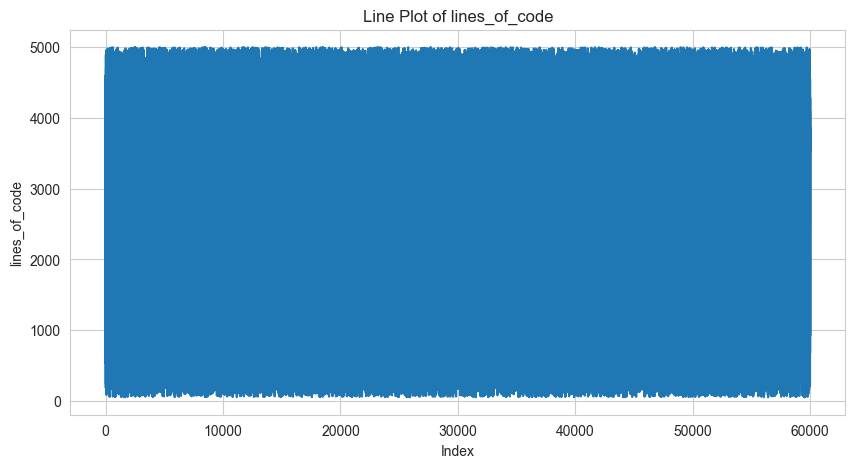

In [5]:
if len(numeric_cols) >= 1:
    plt.figure(figsize=(10,5))
    plt.plot(df[numeric_cols[0]])
    plt.title(f"Line Plot of {numeric_cols[0]}")
    plt.xlabel("Index")
    plt.ylabel(numeric_cols[0])
    plt.show()

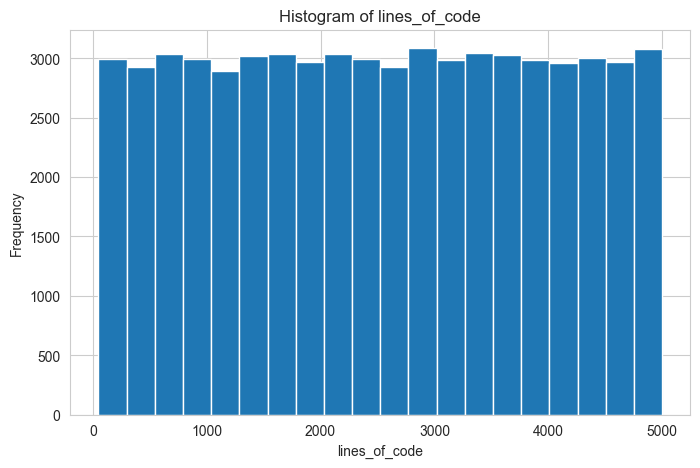

In [6]:
if len(numeric_cols) >= 1:
    plt.figure(figsize=(8,5))
    plt.hist(df[numeric_cols[0]], bins=20)
    plt.title(f"Histogram of {numeric_cols[0]}")
    plt.xlabel(numeric_cols[0])
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Pair plot (limit to first 4 numeric columns for clarity)
sns.pairplot(df[numeric_cols[:4]])
plt.show()

In [ ]:
if len(numeric_cols) >= 1:
    data = df[numeric_cols[0]]

    mean_val = np.mean(data)
    variance_val = np.var(data)
    skewness_val = skew(data)
    kurtosis_val = kurtosis(data)

    print("Statistical Moments for:", numeric_cols[0])
    print("Mean:", mean_val)
    print("Variance:", variance_val)
    print("Skewness:", skewness_val)
    print("Kurtosis:", kurtosis_val)